<a href="https://colab.research.google.com/github/Aryan096yo/demo-file/blob/main/bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('/content/Iris.csv')

In [36]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
df = df.iloc[:,1:]

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder = LabelEncoder()

In [41]:
df['Species'] = encoder.fit_transform(df['Species'])

In [42]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
df = df[df['Species']!=0][['SepalWidthCm','PetalLengthCm','Species']]

In [44]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

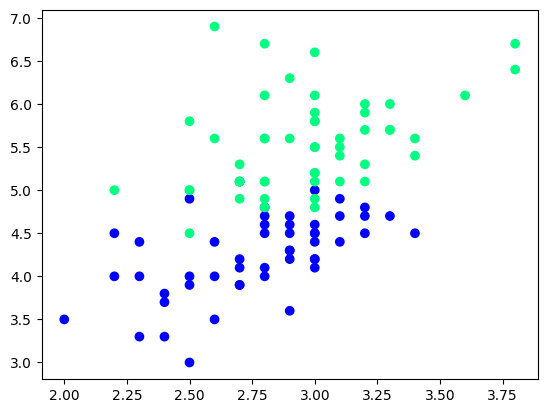

In [46]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [47]:
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [48]:
df_train

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
139,3.1,5.4,2
82,2.7,3.9,1
99,2.8,4.1,1
95,3.0,4.2,1
147,3.0,5.2,2
76,2.8,4.8,1
71,2.8,4.0,1
80,2.4,3.8,1
89,2.5,4.0,1


In [49]:
df_val

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
58,2.9,4.6,1
144,3.3,5.7,2
107,2.9,6.3,2
142,2.7,5.1,2


In [50]:
df_test

,SepalWidthCm,PetalLengthCm,Species
140,3.1,5.6,2
101,2.7,5.1,2
83,2.7,5.1,1
127,3.0,4.9,2
92,2.6,4.0,1


In [51]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [52]:
X_test

array([[3. , 5.1],
       [2.9, 4.6],
       [3.3, 5.7],
       [2.9, 6.3],
       [2.7, 5.1]])

In [53]:
y_test

array([2, 1, 2, 2, 2])

Bagging

In [54]:
df_bag = df_train.sample(8, replace = True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
76,2.8,4.8,1
99,2.8,4.1,1
82,2.7,3.9,1
82,2.7,3.9,1
71,2.8,4.0,1
139,3.1,5.4,2
71,2.8,4.0,1


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [56]:
dt_bag1 = DecisionTreeClassifier()

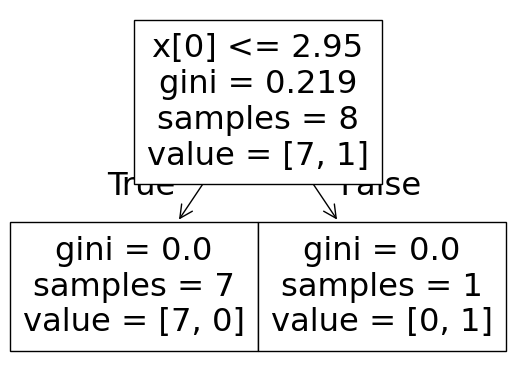

0.6


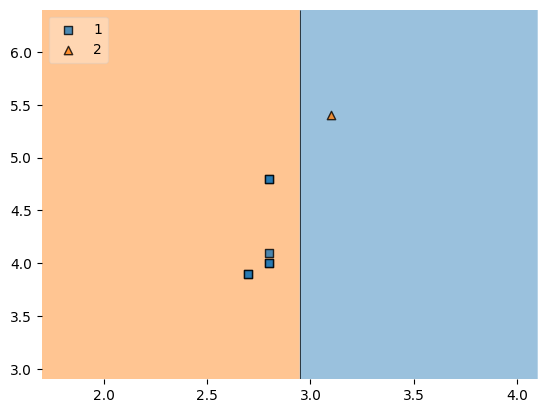

In [57]:
evaluate(dt_bag1, X, y)

In [58]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
147,3.0,5.2,2
60,2.0,3.5,1
147,3.0,5.2,2
147,3.0,5.2,2
147,3.0,5.2,2
139,3.1,5.4,2
71,2.8,4.0,1


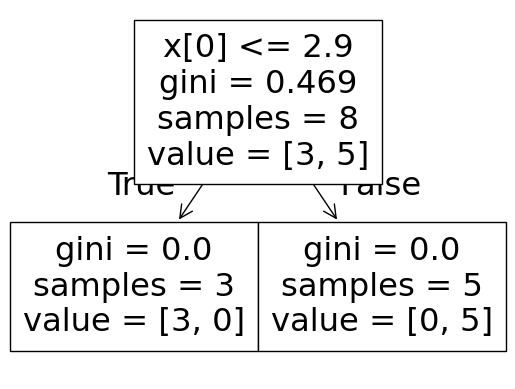

0.6


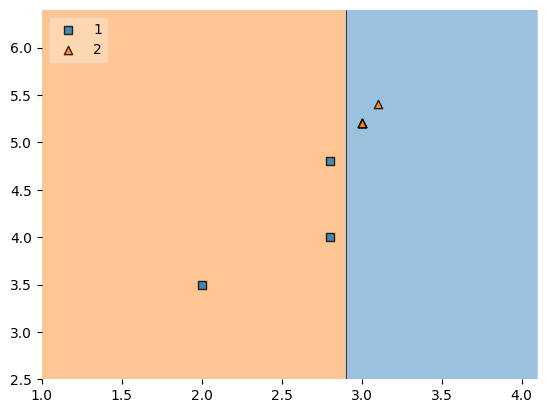

In [59]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [60]:
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
76,2.8,4.8,1
139,3.1,5.4,2
60,2.0,3.5,1
95,3.0,4.2,1
147,3.0,5.2,2
139,3.1,5.4,2
80,2.4,3.8,1


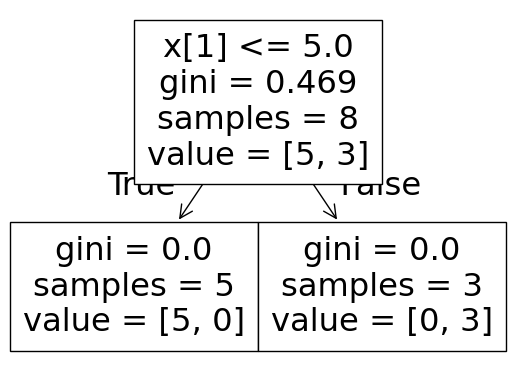

1.0


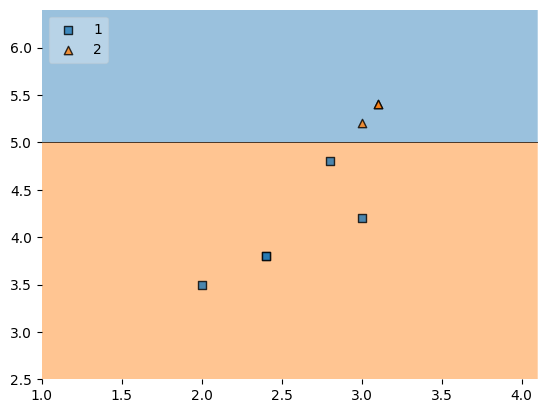

In [61]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [62]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))


In [63]:
df_test

,SepalWidthCm,PetalLengthCm,Species
140,3.1,5.6,2
101,2.7,5.1,2
83,2.7,5.1,1
127,3.0,4.9,2
92,2.6,4.0,1


In [64]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


Pasting

In [65]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
139,3.1,5.4,2
82,2.7,3.9,1
99,2.8,4.1,1
95,3.0,4.2,1
147,3.0,5.2,2
76,2.8,4.8,1
71,2.8,4.0,1
80,2.4,3.8,1
89,2.5,4.0,1


In [66]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
76,2.8,4.8,1
147,3.0,5.2,2
139,3.1,5.4,2
89,2.5,4.0,1
80,2.4,3.8,1
60,2.0,3.5,1
71,2.8,4.0,1
95,3.0,4.2,1


** Random Subspaces **

In [68]:
df1 = pd.read_csv('/content/Iris.csv')
df1 = df1.sample(10)

In [69]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica


In [70]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,SepalLengthCm
68,4.5,6.2
46,1.6,5.1
83,5.1,6.0
28,1.4,5.2
119,5.0,6.0
75,4.4,6.6
90,4.4,5.5
149,5.1,5.9
5,1.7,5.4
124,5.7,6.7


***Random Patches***

In [71]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
46,47,5.1,3.8,1.6,0.2,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
28,29,5.2,3.4,1.4,0.2,Iris-setosa
119,120,6.0,2.2,5.0,1.5,Iris-virginica
75,76,6.6,3.0,4.4,1.4,Iris-versicolor
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
149,150,5.9,3.0,5.1,1.8,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
124,125,6.7,3.3,5.7,2.1,Iris-virginica


In [72]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,Id
119,1.5,120
68,1.5,69
83,1.6,84
28,0.2,29
124,2.1,125
28,0.2,29
124,2.1,125
90,1.2,91
